In [155]:
%load_ext autoreload
%autoreload 2

import imp
imp.reload(classes)
# import import_ipynb
from classes import *
import classes
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn.neighbors import KNeighborsClassifier

known_volume_path = 'C:/Users/GJ/Desktop/연구실/2022SPCUP/WAV_Ordered train set'

# known_volume_path = 'C:/Users/GJ/Desktop/연구실/2022SPCUP/spcup_2022_training_part1'
unknown_volume_path = './spcup_2022_unseen'



rs = 10
known_path, known_labels = file_path_list(known_volume_path)
unknown_path, unknown_labels = file_path_list(unknown_volume_path)
##train set
# print('raw train_set_num :',len(labels))
# X_train_path, X_test_path, y_train_raw, y_test_raw = train_test_split(np.array(known_path),
#                                                                       known_labels, test_size=0.2,
#                                                                       stratify = known_labels, random_state=rs)



data_or= []
labels_or = []
def order_data(data, labels):
    data = np.array(data)
    for i in range(5):
#         print(labels == i)
        data_or.append(data[labels == i])
        labels_or.append(labels[labels==i])
    return np.array(data_or).reshape((1,-1))[0], np.array(labels_or).reshape((1,-1))[0]

X_train_path, y_train_raw = order_data(known_path, known_labels)


n = -1
n_mels = 64
# train = classes.data(X_train_path,y_train_raw,n_mels=n_mels, known = True)
#
# test = classes.data(X_test_path,y_test_raw, n_mels=n_mels, known = True)
#
# unknown =data(unknown_path,unknown_labels, n_mels=n_mels, known = False)

train = classes.data(X_train_path[:n],y_train_raw[:n],n_mels=n_mels, known = True)

# test = classes.data(X_test_path[:n],y_test_raw[:n], n_mels=n_mels, known = True)

unknown =data(unknown_path[:n],unknown_labels[:n], n_mels=n_mels, known = False)

train_km = min_max_scale(train.flatten())
# test_km = min_max_scale(test.flatten())
unseen_km = min_max_scale(unknown.flatten())



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
X_split to X_flattend.shape :  (32293, 2048)
X_split to X_flattend.shape :  (6275, 2048)


In [123]:
# data_or= []
# labels_or = []
# def order_data(data, labels):
#     data = np.array(data)
#     for i in range(5):
# #         print(labels == i)
#         data_or.append(data[labels == i])
#         labels_or.append(labels[labels==i])
#     return np.array(data_or).reshape((1,-1))[0], np.array(labels_or).reshape((1,-1))[0]

# data_or, labels_or = order_data(known_path, known_labels)
# print(data_or, labels_or)

['C:/Users/GJ/Desktop/연구실/2022SPCUP/WAV_Ordered train set/0_1.wav'
 'C:/Users/GJ/Desktop/연구실/2022SPCUP/WAV_Ordered train set/0_10.wav'
 'C:/Users/GJ/Desktop/연구실/2022SPCUP/WAV_Ordered train set/0_100.wav' ...
 'C:/Users/GJ/Desktop/연구실/2022SPCUP/WAV_Ordered train set/4_997.wav'
 'C:/Users/GJ/Desktop/연구실/2022SPCUP/WAV_Ordered train set/4_998.wav'
 'C:/Users/GJ/Desktop/연구실/2022SPCUP/WAV_Ordered train set/4_999.wav'] [0 0 0 ... 4 4 4]


(38568,)


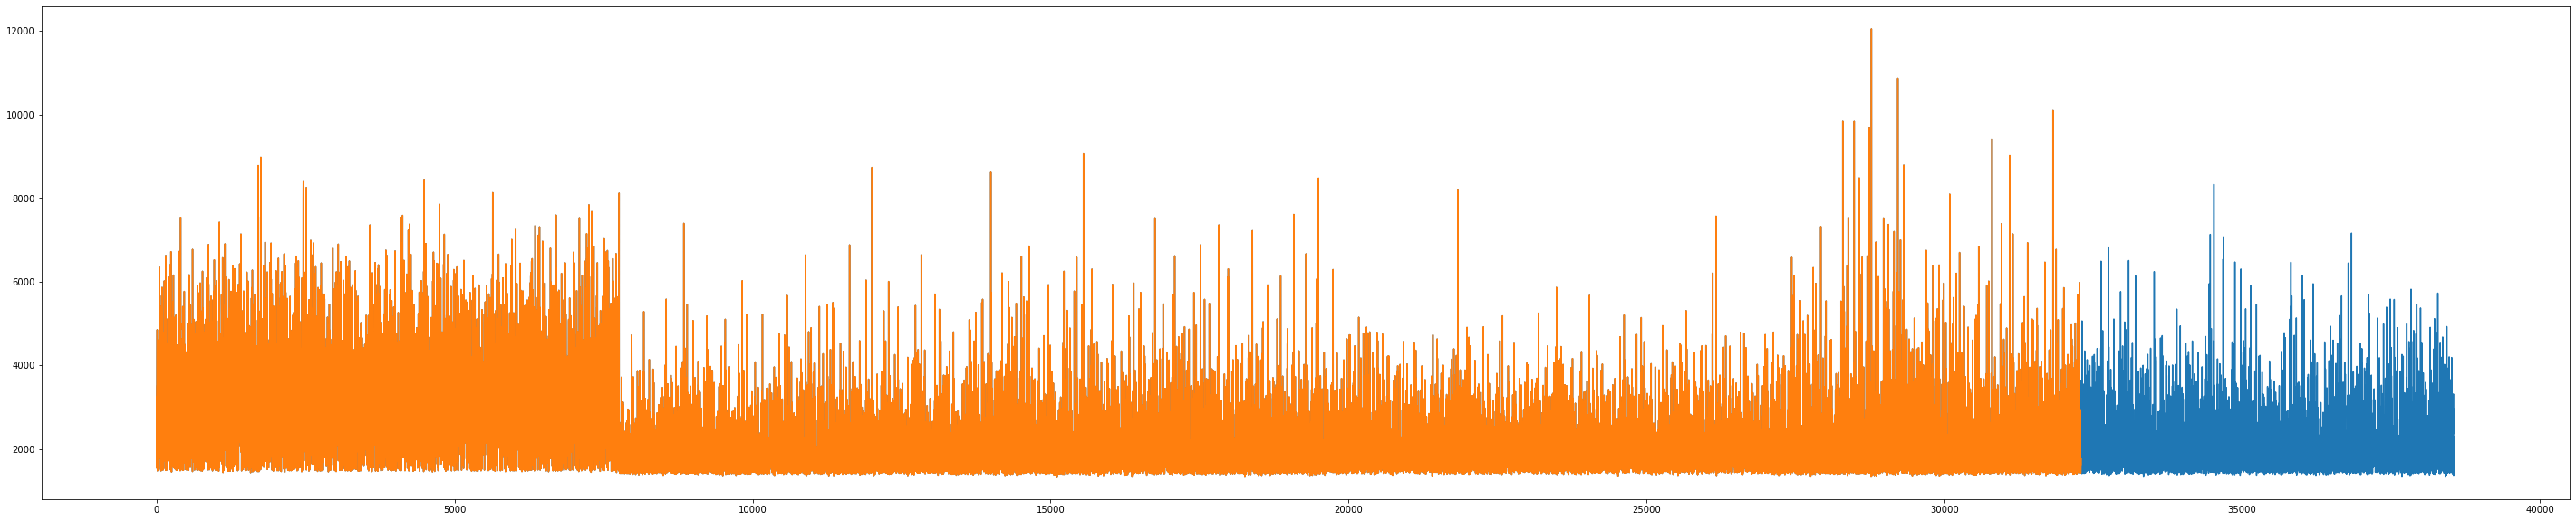

In [157]:
from sklearn.cluster import KMeans
for k in [3]:
    model = KMeans(n_clusters = k, random_state = 10)
    model.fit(train_km)
    vec_test = model.transform(train_km)
    vec_un = model.transform(unseen_km)
    dis_test = np.sqrt(np.sum(np.square(vec_test), axis=1))
    dis_un = np.sqrt(np.sum(np.square(vec_un), axis=1))
    dis_all = np.concatenate((dis_test,dis_un), axis = None)
    print(dis_all.shape)
    f = plt.figure(figsize = (50,10))
    plt.plot(dis_all)
    plt.plot(dis_all[:dis_test.size])
    plt.show()


(12735,)


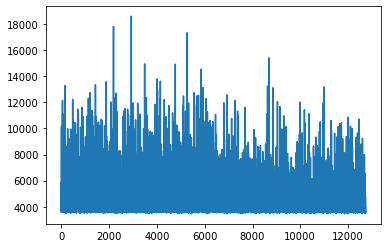

(12735,)


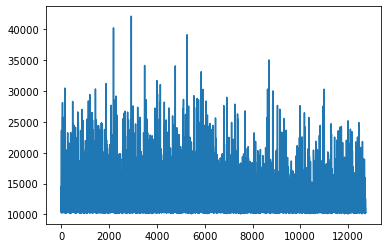

(12735,)


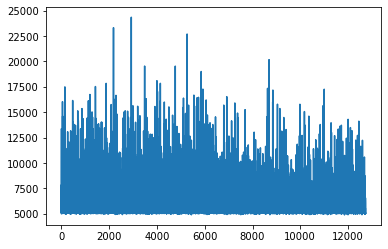

(12735,)


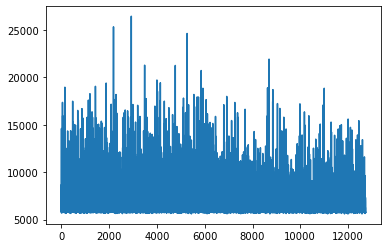

In [57]:
from sklearn.cluster import KMeans
for k in [10,50,17,20]:
    model = KMeans(n_clusters = k, random_state = 10)
    model.fit(train_km)
    vec_test = model.transform(test_km)
    vec_un = model.transform(unseen_km)
    dis_test = np.sqrt(np.sum(np.square(vec_test), axis=1))
    dis_un = np.sqrt(np.sum(np.square(vec_un), axis=1))
    dis_all = np.concatenate((dis_test,dis_un), axis = None)
    print(dis_all.shape)
    plt.subplot()
    plt.plot(dis_all)
    plt.show()

In [48]:
vec_test = model.transform(test_km)
vec_un = model.transform(unseen_km)

In [49]:
dis_test = np.sqrt(np.sum(np.square(vec_test), axis=1))
dis_un = np.sqrt(np.sum(np.square(vec_un), axis=1))
dis_all = np.concatenate((dis_test,dis_un), axis = None)
dis_all.shape

(134,)

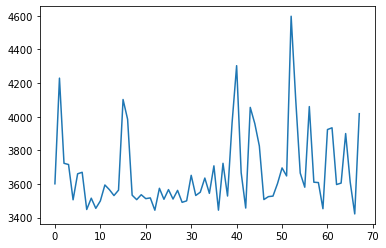

In [50]:
plt.plot(distance)

In [17]:
neigh.kneighbors()

(array([[1427.0266355 , 1433.01900065, 1457.34360496],
        [2080.0687557 , 2509.84834777, 2525.24892492],
        [ 969.97713892, 1001.49726373, 1046.61582022],
        [ 772.4072963 ,  838.3179756 ,  849.88018752],
        [ 711.7072178 ,  718.72755899,  722.16170214],
        [ 714.16821855,  722.00430242,  728.10449682],
        [1092.32971718, 1095.48243072, 1129.57915219],
        [ 233.77756839,  235.44893205,  241.9905767 ],
        [ 211.55693965,  212.23130705,  235.44893205],
        [ 576.11598804,  608.87334966,  610.02136881],
        [ 376.7434573 ,  377.69054086,  383.06269745],
        [ 714.05568688,  753.23479628,  784.19204008],
        [ 626.42593388,  629.8881204 ,  631.89964469],
        [ 476.57073344,  488.95080573,  492.28361965],
        [ 477.68811808,  480.02371874,  490.78837533],
        [1206.06781774, 1237.033363  , 1303.14287959],
        [1200.74711963, 1286.67084491, 1287.68251045],
        [ 403.17373294,  448.85018042,  451.44289563],
        [ 